dd## Step matrix intro

Step matrix is a very powerful tool in the retentioneering arsenal. It allows getting a quick high-level understanding of user behavior. Step matrix has powerful customization options to tailor the output depending on the goal of the analysis.

To better understand how step_matrix works let’s first consider an intuitive example. Let’s say we are analyzing web-store logs and have a dataset with event logs from four user sessions with the following events in the following order:

<img alt="steps" height="300" src="./step_matrix_demo.svg" width="800"/>

We can visualize this dataset as a heatmap indicating what fraction of users were at which step in their trajectories:

<img alt="heatmap" height="350" src="./output.png" width="600"/>

This is the simplest step matrix. It has individual unique events as rows, and columns correspond to the positional number of events in the user log, and the value in the matrix shows what percentage of users have given event at a given step.

Below we will explore how to plot and customize the step matrix


Install retentioneering if running from google.colab or for the first time:

In [1]:
 #!pip install retentioneering

## Basic example

In order to start, we need to:
   - import retentioneering
   - load sample dataset
   - create `eventstream` object

    #@TODO: Link to explanation of eventstream. j.ostanina.


In [2]:
import sys
import pandas as pd
sys.path.insert(0, '..') # @TODO Change imports before publication. j.ostanina

In [3]:
# import retentioneering # @TODO: delete "#". j.ostanina
from src.eventstream import Eventstream # @TODO Change imports before publication. j.ostanina
import pandas as pd
from src import datasets

In [4]:
# load sample user behavior data as a pandas dataframe:
raw_data = pd.read_csv('../src/datasets/data/simple-onlineshop.csv')  # @TODO: либо использовать датафрейм, либо прописать загрузку эвентстрима. j.ostanina

# create source eventstream
source = Eventstream(raw_data)

### Creating an instance of the StepMatrix class

In [5]:
# @TODO рассказать, в чем отличие с пересчетом (fit()) j.ostanina.

In [6]:
from src.tooling.step_matrix import StepMatrix
step_matrix = StepMatrix(
    eventstream=source,
    max_steps=12
    )
step_matrix.fit()

### Methods and attributes

To visualize data as a heatmap, we can call ``.plot()`` method.

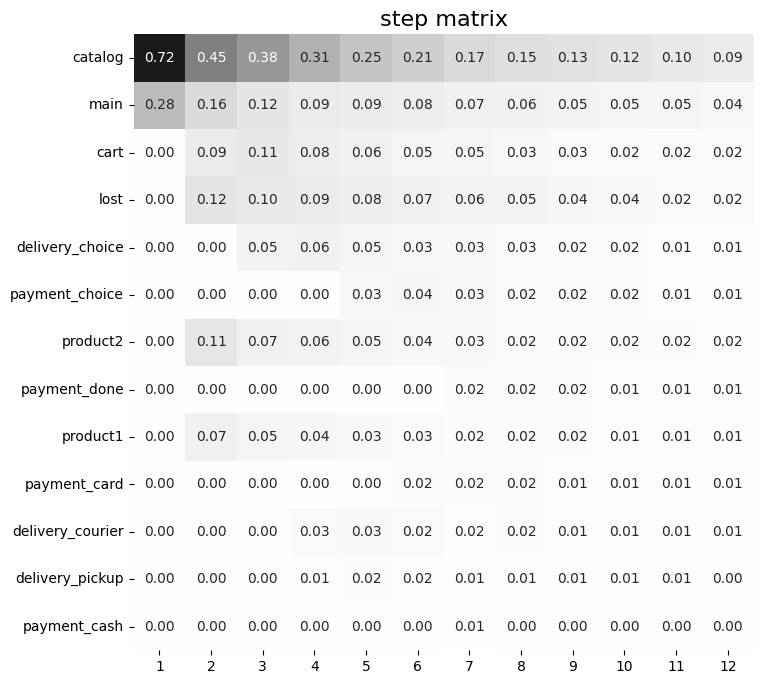

In [7]:
step_matrix.plot();

To see the matrix data, we can call the ``.values`` attribute. This attribute returns two datasets: the step matrix itself and the target events separately. At the moment we are not using the target parameter, so the attribute call looks like this: .values[0].

In [8]:
step_matrix.values[0]

,1,2,3,4,5,6,7,8,9,10,11,12
catalog,0.716076,0.445215,0.384164,0.310051,0.251400,0.211677,0.169022,0.147427,0.134897,0.117835,0.101840,0.094908
main,0.283924,0.162357,0.121834,0.094108,0.085311,0.079712,0.070914,0.064250,0.053586,0.050120,0.049853,0.037057
cart,0.000000,0.089843,0.109571,0.080778,0.064783,0.047454,0.046388,0.031725,0.027459,0.024527,0.021061,0.022394
lost,0.000000,0.118102,0.101306,0.093842,0.075180,0.066649,0.060784,0.054385,0.040523,0.035724,0.023460,0.022661
delivery_choice,0.000000,0.000000,0.054119,0.061584,0.049054,0.034391,0.031725,0.026926,0.018395,0.018395,0.014396,0.012263
payment_choice,0.000000,0.000000,0.000000,0.000000,0.033591,0.043455,0.031991,0.023994,0.022661,0.017329,0.010131,0.011464
product2,0.000000,0.114370,0.065849,0.057851,0.045854,0.035724,0.030392,0.023727,0.020794,0.020261,0.017595,0.016262
payment_done,0.000000,0.000000,0.000000,0.000000,0.000000,0.003999,0.024793,0.024793,0.018395,0.014929,0.013063,0.010131
product1,0.000000,0.070115,0.045055,0.042655,0.031991,0.025860,0.020794,0.017595,0.017062,0.011197,0.012263,0.010397
payment_card,0.000000,0.000000,0.000000,0.000000,0.000000,0.017595,0.020261,0.017062,0.012797,0.010664,0.010131,0.005065


## Single user dataset
So, after getting instructed with the basic syntax of the step matrix tool, let's try it on a small dataset.

To intuitively understand what step_matrix is, let us begin with plotting step_matrix for an extremely simple dataset containing only one user's events.
To do this without going back to the dataframe format, let's use the ``.filter()``.  It is an eventstream method, it takes two arguments as input: a callable function that defines the filtering criteria, and a data scheme, in this case, it is the default data scheme for the eventstream.

In [11]:
single_user = source.filter(lambda df, schema: raw_data[schema.user_id] == 613604495);
# @TODO Если загружать датасет в виде готового эвентстрима, здесь придется переписать на source.to_dataframe() j.ostanina

../src/params_model/params_model.py:68: UserWarning: Callable filter was excluded from schema since JSON schema has no equivalent type.
  params_schema: dict[str, Any] = cls.schema()
../src/params_model/params_model.py:68: UserWarning: Callable negative_function was excluded from schema since JSON schema has no equivalent type.
  params_schema: dict[str, Any] = cls.schema()
../src/params_model/params_model.py:68: UserWarning: Callable positive_function was excluded from schema since JSON schema has no equivalent type.
  params_schema: dict[str, Any] = cls.schema()


To learn more about ``.filter()`` method and how to work with data processors, you can follow the link:

In [12]:
# @TODO Добавить ссылĸу на туториал с датапроцессорами. j.ostanina

Let’s plot a simple intuitive step_matrix for our single user dataset:

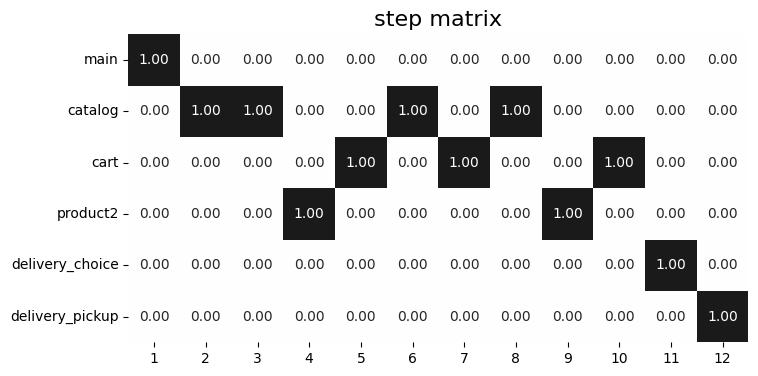

In [13]:
sm_single_user = StepMatrix(
    eventstream=single_user,
    max_steps=12
    )
sm_single_user.fit()
sm_single_user.plot();

As we can see, since we have only one user in this example, step_matrix contains only 0’s and 1’s. At step 1 user had event "main" (100% of users have event main as the first event in the trajectory), then at step 2 user proceeded to catalog, etc. By step 13 user’s trajectory has ended, and there were no more events, so the rest of the table is filled with zeros.

## Full dataset
Let’s now plot step_matrix for the full dataset containing all users:

In [ ]:
sm = StepMatrix(eventstream=source, max_steps=16)
sm.fit()
sm.plot();

Now it is clearly visible that in each cell we have the number of users divided by the total number of users. Looking at the first column we can immediately say that users in the analyzed cohort start their sessions from events catalog (72%) and main (28%). Some conversions start happening after step 7 (row payment_done have 0.02 at step 7). And so on.

## Path end

We can add some synthetic events, for example, path_start and path_end. For the step matrix, the path_end event is very important, step matrix recognizes it and processes it accordingly. To understand how, let's create an eventstream with start and end events.

In [ ]:
source_start_end = source.add_start_end();

In [ ]:
sm = StepMatrix(eventstream=source_start_end, max_steps=16)
sm.fit()
sm.plot();

Note that the "path_end" event is always placed at the end of the step matrix. This line calculates the cumulative share of users who left the clickstream at each step.

## Thresholding

When we plot step_matrix using the full dataset sometimes we want first to focus on the bigger picture and avoid rows with events where an insignificant fraction of users were present. Such thresholding can be done using thresh parameter (float, default: 0). If the row has all values less than the specified thresh, such row will not be shown.

In [ ]:
sm = StepMatrix(eventstream=source, max_steps=16, thresh=0.05)
sm.fit()
sm.plot();

All events cutted away by thresholding are grouped together in THRESHOLDED_X row, where X - is the total number of dropped events.

## Targets analysis

Very often there are specific events of particular importance for product analyst (for example such as cart, or order_confirmed, or subscribe, etc.). Often such events have much lower occurrence rate comparing other events (like main page or catalog) and often ended up thresholded from step_matrix or shown with non-informative coloring. In this case we can isolate those events of particular importance (targets) to individual rows, each of which will have their individual color scale. This can be done with parameter targets:

@TODO https://retentioneering.atlassian.net/browse/ PLAT-342 (Поведение step-matrix при наличии события path_end). Дописать текст, когда будут до конца понятны детали

In [ ]:
sm = StepMatrix(eventstream=source, max_steps=16,
                      thresh=0.05,
                      targets=['payment_done'])
sm.fit()
sm.plot();

Specified target events are always shown in the bottom of step matrix regardless of selected threshold. Multiple targets can be included as a list:

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh=0.05,
                targets=['product1','cart','payment_done'])
sm.fit()
sm.plot();

If we want to compare some targets and plot them using same color scaling, we can combine them in sub-list inside the targets list:

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh=0.05,
                targets=['product1',['cart','payment_done']])
sm.fit()
sm.plot();

Now we can visually compare by color how many users reach cart vs payment_done at particular step in their trajectory.

Targets can be presented as accumulated values (or both):

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh=0.05,
                targets=['product1',['cart','payment_done']],
                accumulated='only')
sm.fit()
sm.plot();

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh=0.05,
                targets=['product1',['cart','payment_done']],
                accumulated='both')
sm.fit()
sm.plot();

To get the target events in DataFrame format, we can use the ``.values`` attribute. If we apply indexing, ``.values[0]`` returns step_matrix, .``values[1]`` returns targets

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=12,
                thresh=0.05,
                targets=['product1',['cart','payment_done']],
                accumulated='both')
sm.fit()
sm.values[0]

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=12,
                thresh=0.05,
                targets=['product1',['cart','payment_done']],
                accumulated='both')
sm.fit()
sm.values[1]

## Centered step matrix

Sometimes we are interested in flow of users through specific event: how do users reach specific event and what do they do after? This information can be visualized with step_marix using parameter ``centered``:

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh = 0.2,
                centered={'event':'cart',
                          'left_gap':5,
                          'occurrence':1})
sm.fit()
sm.plot();

Note, that when plotting step_matrix with parameter centered we only keep users who have reached the specified event (column 0 has value 1 at the specified event). Parameter centered is a dictionary which requires three keys:

* ‘event’ - the name of the event we are interested in. This event will be taken as 0. Negative step numbers will correspond to events before the selected event and positive step numbers will correspond to steps after the selected event

* ‘left_gap’ - integer number which indicates how many steps before the centered event we want to show on the step matrix

* ‘occurrence’ - which occurrence number of target event we are interested in. For example, in the illustration above, all trajectories will be aligned to have the first ‘cart’ occurrence as step 0

Importantly, when a centered step matrix is used, only users who have selected events in their trajectories present (or it’s n`th occurrence) will be shown. Therefore, the column with step index 0 will always have 1 at the selected event and zero at all other events. The fraction of users kept for the centered step matrix is shown in the title. In the example above, 51.3% of users have reached the event ‘cart’ at least once.

We can use all targets functionality with centered step_matrix, for example:

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh = 0.2,
                centered={'event':'cart',
                          'left_gap':5,
                          'occurrence':1},
                targets=['payment_done'])
sm.fit()
sm.plot();

## Custom events sorting

Sometimes it is needed to obtain step_matrix with events listed in the specific order (for example, to compare two step_matrixes). This can be done with parameter sorting which accepts a list of event names in the required order to show up in the step matrix. Let’s consider an example:

In [ ]:
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh=0.07)
sm.fit()
sm.plot();

Let’s say we would like to change the order of the events in the resulted step_matrix. First, we can obtain a list of event names from the step_matrix output using  ``.values[0]``:

In [ ]:
sm.values[0].index

Now we can conveniently copy the list of events, reorganize it in the required order and pass it to the step_matrix function as a sorting parameter:

In [ ]:
custom_order = ['main',
                'catalog',
                'product1',
                'product2',
                'cart',
                'lost',
                'THRESHOLDED_7']
sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh=0.07,
                sorting=custom_order)
sm.fit()
sm.plot();

Note, that ordering only affects non-target events. Target events will always be in the same order as they are specified in the parameter targets.

## Differential step_matrix

Sometimes we need to compare the behavior of several groups of users. For example, when we would like to compare the behavior of users who had a conversion to target vs. those who had not, compare the behavior of test and control groups in the A/B test, or compare behavior between specific segments of users.

In this case, it is informative to plot a step_matrix as the difference between step_matrix for group_A and step_matrix for group_B. This can be done using parameter groups, which require a tuple of two elements (g1 and g2): where g_1 and g_2 are collections of user_id`s (list, tuple, or set). Two separate step_matrixes M1 and M2 will be calculated for users from g_1 and g_2, respectively. The resulting matrix will be the matrix M = M1-M2. Note, that values in each column in the differential step matrix will always sum up to 0 (since columns in both M1 and M2 always sum up to 1).


In [ ]:
g1 = set(raw_data[raw_data['event']=='payment_done']['user_id'])
g2 = set(raw_data['user_id']) - g1

sm = StepMatrix(eventstream=source,
                max_steps=16,
                thresh = 0.05,
                centered={'event':'cart',
                          'left_gap':5,
                          'occurrence':1},
                groups=(g1, g2))
sm.fit()
sm.plot();

In [ ]:
# @TODO написать раздел про кластера (когда они будут готовы) j.ostanina

## Weight_col

All this time, we have been calculating matrices by the percentage of users remaining in the clickstream by a certain step. But for 100% we can take not only users. For example, we can take sessions.

To do this, we need to divide the event stream into sessions. The split sessions method will help us with this. But first,
first we need to decide on the duration of the session.

To find the average session duration, you can use a histogram that shows the distribution of the delta between 2 consecutive events, it's an eventstream method ``.timedelta_hist()``. The cutoff should be chosen from the segment between the "bells", as shown in the figure.


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
        1.000e+00, 3.000e+00, 9.000e+00, 4.000e+00, 8.000e+00, 1.100e+01,
        2.300e+01, 2.200e+01, 2.800e+01, 4.300e+01, 6.100e+01, 8.000e+01,
        7.800e+01, 1.180e+02, 1.600e+02, 2.210e+02, 2.760e+02, 3.250e+02,
        4.030e+02, 5.100e+02, 5.760e+02, 8.430e+02, 4.045e+03, 1.125e+03,
        1.197e+03, 1.295e+03, 1.474e+03, 1.674e+03, 1.750e+03, 1.768e+03,
        1.705e+03, 1.801e+03, 1.674e+03, 1.615e+03, 1.442e+03, 1.088e+03,
        8.060e+02, 4.090e+02, 1.700e+02, 5.200e+01, 1.300e+01, 2.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 5.000e+00,
        4.000e+00, 7.000e+00, 5.000e+00, 6.000e+00, 1.000e+01, 2.000e+01,
        3.700e+01, 3.000e+01, 4.200e+0

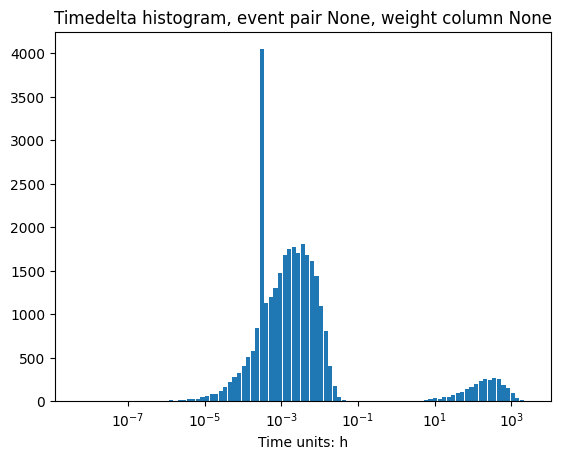

In [120]:
source.timedelta_hist(timedelta_unit='h',
                      bins=100, log_scale=True).plot()

In [122]:
# @TODO узнать, сколько в итоге получилась длина сессии?

Then we set the parameters for dividing into sessions: the length of the session will be 2 hours. The resulting object will be a new eventstream.

In [ ]:
result = source.split_sessions((2.0,'h'), session_col='session_id')

To learn more about working with data processors, you can follow the link

In [ ]:
# @TODO cсылка на .timedelta_hist()

In [ ]:
# @TODO Добавить ссылĸу на туториал с датапроцессорами. j.ostanina

Now we feed the result as input to the step_matrix tool and specify the ``weight_col=['session_id']`` parameter.

In [ ]:
sm = StepMatrix(eventstream=result,
                max_steps=16,
                weight_col=['session_id'])
sm.fit()
sm.plot();

Now we see in the cells the share of all sessions for which the specified event happened at the specified step. For example, for 54 percents of sessions, the third step was a catalog.

### Сalling StepMatrix as an eventstream method

We can also call StepMatrix as an eventstream method. By default, the ``.plot()`` method is called.
``values`` attribute is also avaliable, but it can be done in one line:

../src/eventstream/eventstream.py:548: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


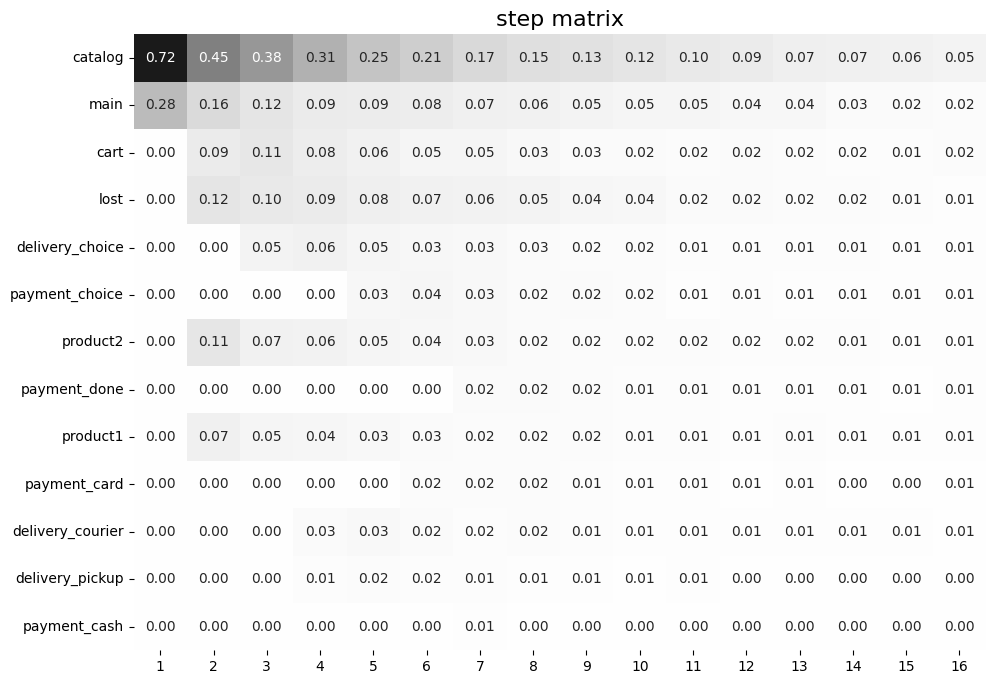

In [123]:
source.step_matrix(max_steps=16);

../src/eventstream/eventstream.py:548: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


,1,2,3,4,5,6,7,8,9,10,11,12
catalog,0.716076,0.445215,0.384164,0.310051,0.251400,0.211677,0.169022,0.147427,0.134897,0.117835,0.101840,0.094908
main,0.283924,0.162357,0.121834,0.094108,0.085311,0.079712,0.070914,0.064250,0.053586,0.050120,0.049853,0.037057
cart,0.000000,0.089843,0.109571,0.080778,0.064783,0.047454,0.046388,0.031725,0.027459,0.024527,0.021061,0.022394
lost,0.000000,0.118102,0.101306,0.093842,0.075180,0.066649,0.060784,0.054385,0.040523,0.035724,0.023460,0.022661
delivery_choice,0.000000,0.000000,0.054119,0.061584,0.049054,0.034391,0.031725,0.026926,0.018395,0.018395,0.014396,0.012263
payment_choice,0.000000,0.000000,0.000000,0.000000,0.033591,0.043455,0.031991,0.023994,0.022661,0.017329,0.010131,0.011464
product2,0.000000,0.114370,0.065849,0.057851,0.045854,0.035724,0.030392,0.023727,0.020794,0.020261,0.017595,0.016262
payment_done,0.000000,0.000000,0.000000,0.000000,0.000000,0.003999,0.024793,0.024793,0.018395,0.014929,0.013063,0.010131
product1,0.000000,0.070115,0.045055,0.042655,0.031991,0.025860,0.020794,0.017595,0.017062,0.011197,0.012263,0.010397
payment_card,0.000000,0.000000,0.000000,0.000000,0.000000,0.017595,0.020261,0.017062,0.012797,0.010664,0.010131,0.005065


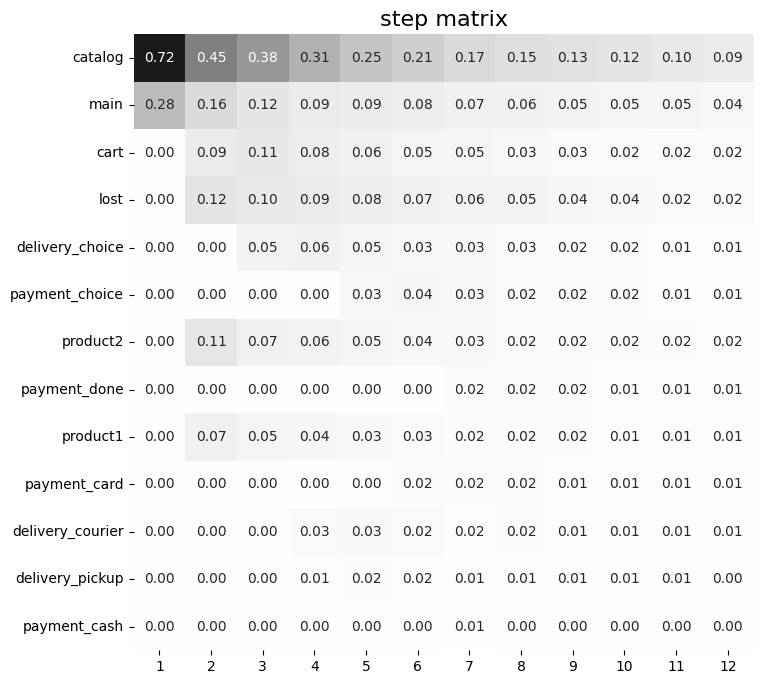

In [124]:
source.step_matrix(max_steps=12).values[0]